## Exploratory Data Analysis

El Análisis Exploratorio de Datos (EDA) es una poderosa técnica utilizada en la ciencia de datos para comprender y analizar conjuntos de datos. Su objetivo principal es revelar patrones, tendencias, relaciones y posibles anomalías presentes en los datos antes de emprender análisis más avanzados o la construcción de modelos predictivos. En otras palabras, el EDA nos ayuda a obtener una visión completa y detallada de nuestros datos, lo que resulta esencial para la toma de decisiones informadas.

¿Por qué es interesante realizar un EDA en un conjunto de datos de recuento de vehículos en un polígono industrial? Aquí hay algunas razones convincentes por las cuales sería interesante aplicar el Análisis Exploratorio de Datos a estos datos:

**Identificación de patrones de tráfico**: El EDA puede ayudarnos a identificar patrones de tráfico en función del día de la semana, la hora del día o incluso las condiciones climáticas. Esto puede ser crucial para la gestión del tráfico y la toma de decisiones relacionadas con la logística en el polígono industrial.

**Detección de anomalías**: El análisis exploratorio puede ayudarnos a identificar eventos inusuales o picos en el flujo de vehículos. Estos picos pueden estar relacionados con situaciones de tráfico inesperadas o eventos especiales en el polígono. Identificar estas anomalías puede ser útil para la planificación y la respuesta rápida.

**Optimización de recursos**: Con un EDA adecuado, podemos comprender mejor la distribución de diferentes tipos de vehículos a lo largo del tiempo. Esto puede contribuir a la optimización de recursos, como la asignación de personal para la gestión del tráfico o la planificación de espacios de estacionamiento específicos para ciertos tipos de vehículos.

**Tendencias a largo plazo**: El análisis de tendencias a largo plazo en los datos puede proporcionar información valiosa sobre el crecimiento o la disminución del tráfico en el polígono industrial. Esta información puede ser fundamental para la planificación a largo plazo y la inversión en infraestructura.

**Apoyo a la toma de decisiones**: Los resultados del EDA pueden servir como base para la toma de decisiones informadas en relación con la gestión del tráfico, la seguridad en el polígono y la eficiencia operativa.

Aplicar el Análisis Exploratorio de Datos a un conjunto de datos que registra el recuento de vehículos en un polígono industrial puede proporcionar una comprensión profunda y valiosa de los patrones de tráfico y las tendencias, lo que a su vez puede contribuir a la toma de decisiones más eficiente y a la mejora de la gestión en dicho polígono.

### Librerías

Librerías y funciones que se importan en este estudio:

  1. `import pandas as pd`:
    - `pandas` es una poderosa biblioteca de Python utilizada para la manipulación y análisis de datos.
    - `pd` es un alias comúnmente utilizado para referirse a la biblioteca `pandas`.

  2. `import numpy as npy`:
    - `numpy` es una librería fundamental para la computación numérica en Python, que proporciona soporte para arreglos y operaciones matriciales.
    - `npy` es un alias comúnmente utilizado para referirse a la biblioteca `numpy`.

  3. `import matplotlib.pyplot as plt`:
    - `matplotlib` es una biblioteca ampliamente utilizada para la creación de gráficos y visualización de datos en Python.
    - `pyplot` es un módulo dentro de `matplotlib` que proporciona una interfaz similar a la de MATLAB para crear gráficos.
    - `plt` es un alias comúnmente utilizado para referirse al módulo `pyplot`.

  4. `from matplotlib import dates`:
    - `matplotlib.dates` es un módulo de `matplotlib` que se utiliza para trabajar con fechas y horas en gráficos, como la formateación de ejes de tiempo.

  5. `import seaborn as sns`:
    - `seaborn` es una biblioteca de visualización de datos que se basa en `matplotlib` y simplifica la creación de gráficos estadísticos atractivos y informativos en Python.

  6. `from datetime import datetime`:
    - `datetime` es un módulo de Python que proporciona clases y funciones para trabajar con fechas y horas.

Estas librerías y funciones son fundamentales para tareas como la manipulación de datos, la visualización de gráficos, la construcción de modelos de aprendizaje automático y la creación de interfaces interactivas en Python.

In [20]:
import pandas as pd
import numpy as npy

import matplotlib.pyplot as plt
from matplotlib import dates
import seaborn as sns

from datetime import datetime

### Funciones

Trabajar con fechas siempre es complicado, así que para este estudio se ha generado una función propia para trabajar cómodamente con las fechas.

In [21]:
# https://www.disfrutalasmatematicas.com/medida/hora-convertir.html
# https://es.linkedin.com/pulse/de-am-pm-24hrs-con-python-luis-felipe-castro-calder%C3%B3n

def change_am_pm_24(x, in_pattern = '%I:%M:%S %p', out_pattern = '%H:%M:%S'):
    
    """
    Convierte una cadena de tiempo en formato AM/PM a formato de 24 horas.

    Parámetros:
    ===========
    x (str)           : Cadena de tiempo en formato AM/PM.
    in_pattern (str)  : Formato de entrada de la cadena de tiempo (por defecto, '%I:%M:%S %p').
    out_pattern (str) : Formato de salida de la cadena de tiempo (por defecto, '%H:%M:%S').

    Retorna:
    ========
    datetime          : Objeto de datetime con la cadena de tiempo convertida a formato de 24 horas.
    """
    
    in_time = datetime.strptime(x, in_pattern)
    out_time = datetime.strftime(in_time, out_pattern)

    return pd.to_datetime(out_time, format = "%H:%M:%S")

### Datos

Cargamos los datos `train_datos-trafico.csv` y analizaremos la información contenida en el fichero.

In [22]:
data = pd.read_csv('../data/train_datos-trafico.csv',)

#### Limpieza y organización de los datos

Categorizamos las variables `Day of the week` y `Traffic Situation`. La variable `Traffic Situation`tiene cuatro categorías ordenadas según el tráfico registrado: `low` cuando apenas hay tráfico, `normal` cuando hay el tráfico habitual, `high` cuando hay bastante tráfico y `heavy` cuando las retenciones son importantes.

In [23]:
data['Day of the week'] = \
    pd.Categorical(data['Day of the week'], 
                   categories = ['Monday', 'Tuesday', 'Wednesday', 
                                 'Thursday', 'Friday', 'Saturday', 'Sunday'])

data['Traffic Situation'] = \
    pd.Categorical(data['Traffic Situation'],
                   categories = ['low', 'normal', 'high', 'heavy'])

Creamos una nueva variable a partir de `Date`.

In [24]:
 data.Time = list(map(change_am_pm_24, data.Time))

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2380 entries, 0 to 2379
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Time               2380 non-null   datetime64[ns]
 1   Date               2380 non-null   int64         
 2   Day of the week    2380 non-null   category      
 3   CarCount           2380 non-null   int64         
 4   BikeCount          2380 non-null   int64         
 5   BusCount           2380 non-null   int64         
 6   TruckCount         2380 non-null   int64         
 7   Total              2380 non-null   int64         
 8   Traffic Situation  2380 non-null   category      
dtypes: category(2), datetime64[ns](1), int64(6)
memory usage: 135.5 KB


In [26]:
data.head().to_latex()

'\\begin{tabular}{llrlrrrrrl}\n\\toprule\n & Time & Date & Day of the week & CarCount & BikeCount & BusCount & TruckCount & Total & Traffic Situation \\\\\n\\midrule\n0 & 1900-01-01 05:15:00 & 26 & Thursday & 64 & 27 & 5 & 5 & 101 & low \\\\\n1 & 1900-01-01 07:15:00 & 15 & Sunday & 150 & 13 & 31 & 4 & 198 & heavy \\\\\n2 & 1900-01-01 07:00:00 & 31 & Tuesday & 134 & 10 & 44 & 0 & 188 & heavy \\\\\n3 & 1900-01-01 05:45:00 & 29 & Sunday & 108 & 24 & 2 & 19 & 153 & normal \\\\\n4 & 1900-01-01 20:15:00 & 31 & Tuesday & 80 & 14 & 20 & 15 & 129 & normal \\\\\n\\bottomrule\n\\end{tabular}\n'

### Análisis de la distribución

Ya que la finalidad del proyecto es predecir la intensidad del tráfico a la entrada de un polígono industrial, vamos a visualizar primero el número de vehículos registrados según día y hora. _A priori_ es fácil considerar que el día de la semana y la hora a la que se registra el número de vehículos serán las dos variables más importantes a tener en cuenta. 

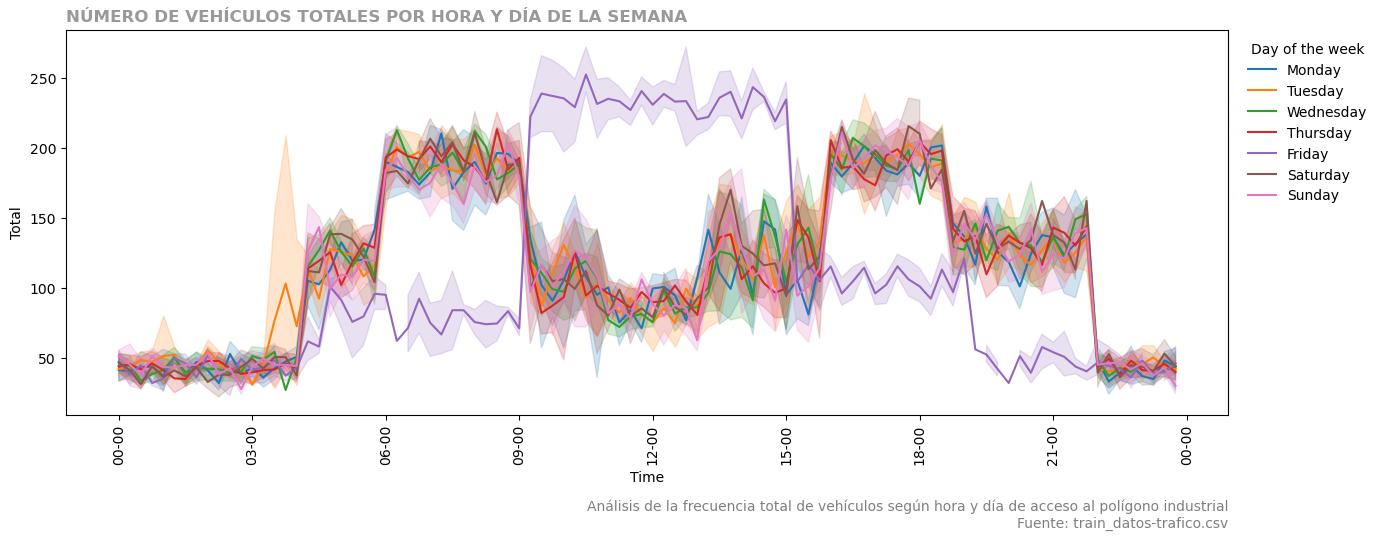

In [27]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (15,5))

g = sns.lineplot(x = 'Time', y = 'Total', hue = 'Day of the week', data = data, ax = ax)
ax.tick_params(axis = 'x', rotation = 90)
ax.xaxis.set_major_formatter(dates.DateFormatter("%H-%M"))
ax.set_title('Número de vehículos totales por hora y día de la semana'.upper(), loc = 'left', color = '0.6', fontweight = 700)

ax.legend(frameon = False, title = 'Day of the week', bbox_to_anchor = (1.13, 1.0))

texto = "Análisis de la frecuencia total de vehículos según hora y día de acceso al polígono industrial"
texto = texto + "\nFuente: train_datos-trafico.csv"

# Agrega el texto fuera de la figura, abajo a la derecha
ax.annotate(texto, xy=(1, -0.3), 
            xycoords = 'axes fraction', 
            fontsize = 10, color = '0.5',
            horizontalalignment = 'right', 
            verticalalignment = 'bottom')

plt.show()

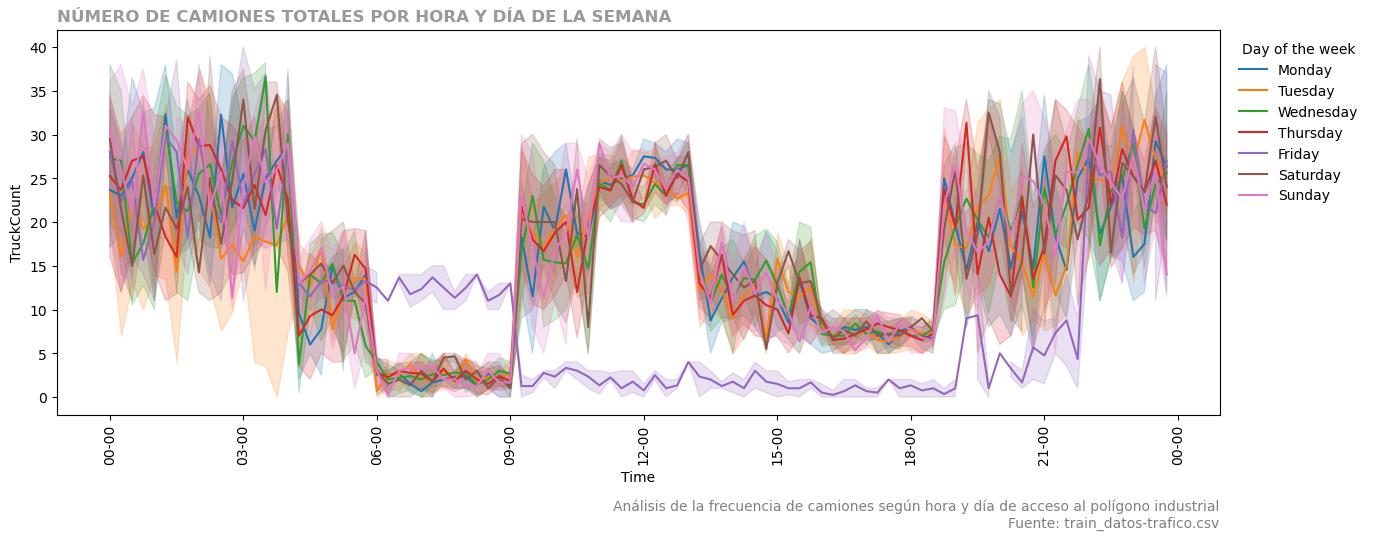

In [28]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (15,5))

g = sns.lineplot(x = 'Time', y = 'TruckCount', hue = 'Day of the week', data = data, ax = ax)
ax.tick_params(axis = 'x', rotation = 90)
ax.xaxis.set_major_formatter(dates.DateFormatter("%H-%M"))

ax.set_title('Número de camiones totales por hora y día de la semana'.upper(), loc = 'left', color = '0.6', fontweight = 700)
ax.legend(frameon = False, title = 'Day of the week', bbox_to_anchor = (1.13, 1.0))

texto = "Análisis de la frecuencia de camiones según hora y día de acceso al polígono industrial"
texto = texto + "\nFuente: train_datos-trafico.csv"

# Agrega el texto fuera de la figura, abajo a la derecha
ax.annotate(texto, xy=(1, -0.3), 
            xycoords = 'axes fraction', 
            fontsize = 10, color = '0.5',
            horizontalalignment = 'right', 
            verticalalignment = 'bottom')

plt.show()

In [29]:
data['Day of the week'].value_counts(sort = False)

Day of the week
Monday       307
Tuesday      380
Wednesday    383
Thursday     389
Friday       313
Saturday     298
Sunday       310
Name: count, dtype: int64

In [30]:
print(pd.crosstab(data['Traffic Situation'], data['Day of the week']).to_latex(index = False,))

\begin{tabular}{rrrrrrr}
\toprule
Monday & Tuesday & Wednesday & Thursday & Friday & Saturday & Sunday \\
\midrule
27 & 28 & 27 & 29 & 88 & 16 & 23 \\
175 & 220 & 216 & 218 & 142 & 184 & 174 \\
40 & 43 & 49 & 49 & 0 & 30 & 47 \\
65 & 89 & 91 & 93 & 83 & 68 & 66 \\
\bottomrule
\end{tabular}



In [31]:
print(
data.groupby(['Day of the week'])[['CarCount', 'BikeCount', 'BusCount', 'TruckCount']].median().T\
    .to_latex(index = True, caption = 'Valor promedio del número de vehículos cada día de la semana.', 
              bold_rows = True, 
              float_format = "%.1f", 
              decimal = ','))

\begin{table}
\caption{Valor promedio del número de vehículos cada día de la semana.}
\begin{tabular}{lrrrrrrr}
\toprule
Day of the week & Monday & Tuesday & Wednesday & Thursday & Friday & Saturday & Sunday \\
\midrule
\textbf{CarCount} & 63,0 & 66,0 & 73,0 & 64,0 & 55,0 & 65,5 & 66,0 \\
\textbf{BikeCount} & 10,0 & 12,0 & 13,0 & 13,0 & 14,0 & 12,0 & 13,0 \\
\textbf{BusCount} & 12,0 & 13,0 & 13,0 & 13,0 & 5,0 & 12,0 & 12,5 \\
\textbf{TruckCount} & 16,0 & 14,5 & 15,0 & 14,0 & 5,0 & 17,0 & 16,0 \\
\bottomrule
\end{tabular}
\end{table}



In [32]:
pd.crosstab(data.Date, data['Day of the week'])

Day of the week,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
Date,,,,,,,
1,0,0,83,0,0,0,0
2,0,0,0,74,0,0,0
3,0,0,0,0,75,0,0
4,0,0,0,0,0,79,0
5,0,0,0,0,0,0,82
6,73,0,0,0,0,0,0
7,0,73,0,0,0,0,0
8,0,0,74,0,0,0,0
9,0,0,0,88,0,0,0


### Análisis de posibles patrones

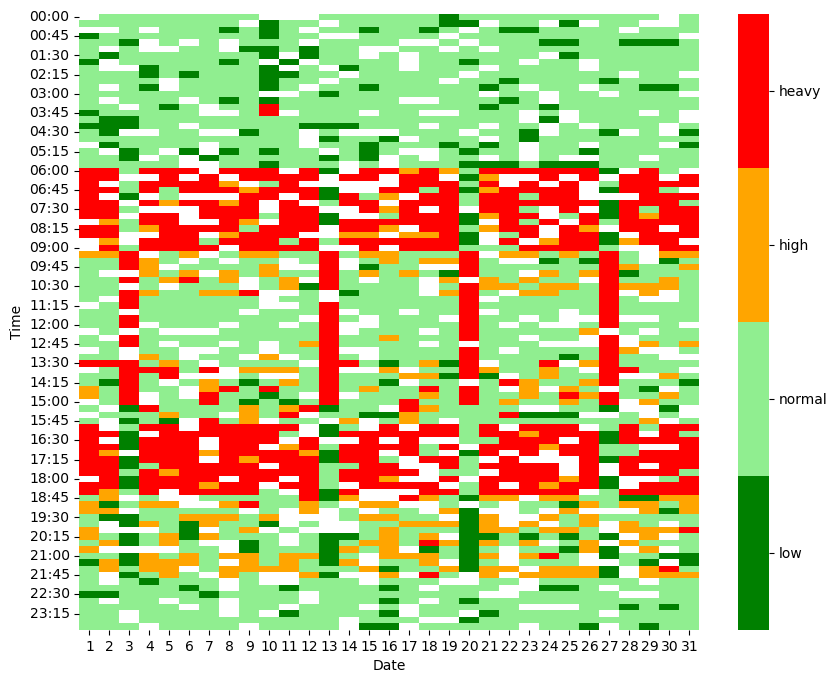

In [33]:
 # palette = {'normal': 'green', 'low': 'lightgreen', 'high': 'orange', 'heavy': 'red'},

value_to_int = {'low': 0, 'normal': 1, 'high': 2, 'heavy':3}
n = len(value_to_int) 
# discrete colormap (n samples from a given cmap)

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10,8))

data_to_heatmap = data[['Time', 'Date', 'Traffic Situation']].replace(value_to_int).copy()
data_to_heatmap['Traffic Situation'] = pd.to_numeric(data_to_heatmap['Traffic Situation'] )

cmap = sns.color_palette("YlOrBr", n) 
cmap = sns.color_palette("Spectral", n)
cmap = sns.color_palette("coolwarm", n)

cmap = sns.color_palette(['green', 'lightgreen', 'orange', 'red'])

ax = sns.heatmap(data_to_heatmap.pivot(index = 'Time', columns = 'Date', values = 'Traffic Situation'), cmap = cmap) 

# modify colorbar:
colorbar = ax.collections[0].colorbar 
r = colorbar.vmax - colorbar.vmin 
colorbar.set_ticks([colorbar.vmin + r / n * (0.5 + i) for i in range(n)])
colorbar.set_ticklabels(list(value_to_int.keys()))    

#ax.yaxis.set_major_formatter(dates.DateFormatter("%H:%M"))
ax.set_yticklabels([x.get_text()[11:16] for x in ax.get_yticklabels(which = 'major')])

plt.show()

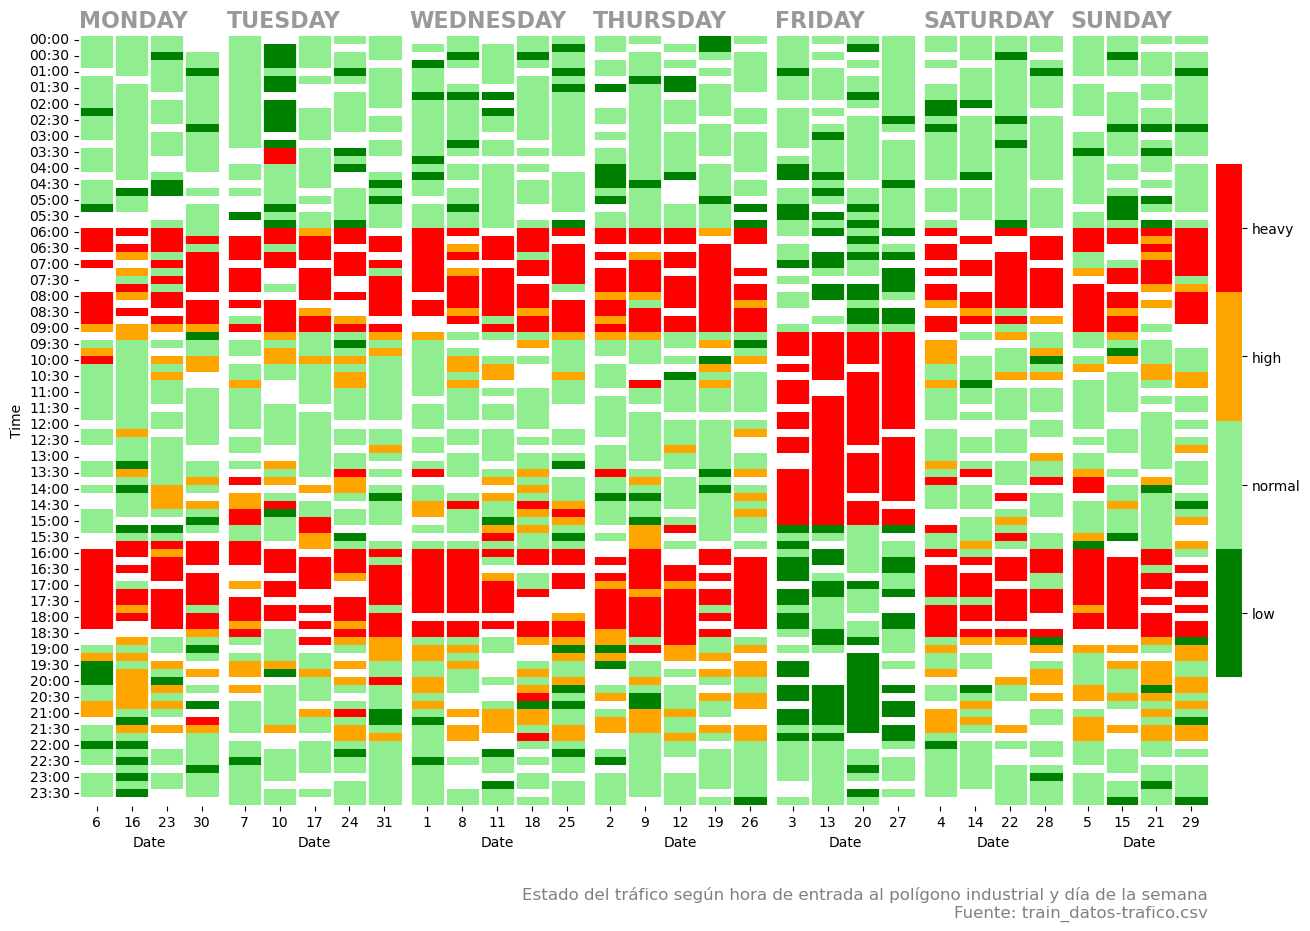

In [42]:
 # palette = {'normal': 'green', 'low': 'lightgreen', 'high': 'orange', 'heavy': 'red'},

value_to_int = {'low': 0, 'normal': 1, 'high': 2, 'heavy':3}
n = len(value_to_int) 
# discrete colormap (n samples from a given cmap)

fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7) = plt.subplots(nrows = 1, ncols = 7, figsize = (15, 10), 
                                                        sharey = True, 
                                                        gridspec_kw = {'width_ratios':[4,5,5,5,4,4,4.9]})

for day, ax, axv in zip(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
    [ax1, ax2, ax3, ax4, ax5, ax6, ax7], [4,5,5,5,4,4,4,4]):

    data_to_heatmap = data[['Time', 'Date', 'Traffic Situation', 'Day of the week']].replace(value_to_int).copy()
    data_to_heatmap['Traffic Situation'] = pd.to_numeric(data_to_heatmap['Traffic Situation'] )
    data_to_heatmap = data_to_heatmap.loc[data_to_heatmap['Day of the week'] == day, ['Time', 'Date', 'Traffic Situation',]].copy()

    cmap = sns.color_palette("YlOrBr", n) 
    cmap = sns.color_palette("Spectral", n)
    cmap = sns.color_palette("coolwarm", n)

    cmap = sns.color_palette(['green', 'lightgreen', 'orange', 'red'])

    if day != 'Sunday':
    
        sns.heatmap(data_to_heatmap.pivot(index = 'Time', columns = 'Date', values = 'Traffic Situation'), 
                         cmap = cmap, cbar = False, ax = ax) 

    else:
        sns.heatmap(data_to_heatmap.pivot(index = 'Time', columns = 'Date', values = 'Traffic Situation'), 
                         cmap = cmap, cbar = True, ax = ax,) 
        # modify colorbar:
        colorbar = ax.collections[0].colorbar 
        r = colorbar.vmax - colorbar.vmin 
        colorbar.set_ticks([colorbar.vmin + r / n * (0.5 + i) for i in range(n)])
        colorbar.set_ticklabels(list(value_to_int.keys()))    
        
    ax.set_title(day.upper(), loc = 'left', fontsize = 16, fontweight = 900, color = '0.6')
    
    for x in range(axv):
        ax.axvline(x = x, linewidth = 2, color = "1.0")

    #ax.yaxis.set_major_formatter(dates.DateFormatter("%H:%M"))
ax1.set_yticklabels([x.get_text()[11:16] for x in ax1.get_yticklabels(which = 'major')])

for ax in [ax2,ax3,ax4,ax5,ax6,ax7]:
    ax.set_ylabel('')
    ax.tick_params(left=False, bottom=True)

    
texto = "Estado del tráfico según hora de entrada al polígono industrial y día de la semana"
texto = texto + "\nFuente: train_datos-trafico.csv"

# Agrega el texto fuera de la figura, abajo a la derecha
ax7.annotate(texto, xy=(1, -0.15), 
            xycoords = 'axes fraction', 
            fontsize = 12, color = '0.5',
            horizontalalignment = 'right', 
            verticalalignment = 'bottom')
    
fig.subplots_adjust(wspace = 0.05)

fig.savefig('./figures/traffic-situation-by-day-and-hour.pdf', format = 'pdf', bbox_inches = 'tight')

plt.show()

[matplotlib.text](https://matplotlib.org/stable/api/text_api.html)

00:00 [(-25567.0, 0), (-25566.0, 0)]
03:00 [(-25566.875, 0)]
06:00 [(-25566.75, 0)]
09:00 [(-25566.625, 0)]
12:00 [(-25566.5, 0)]
15:00 [(-25566.375, 0)]
18:00 [(-25566.25, 0)]
21:00 [(-25566.125, 0)]


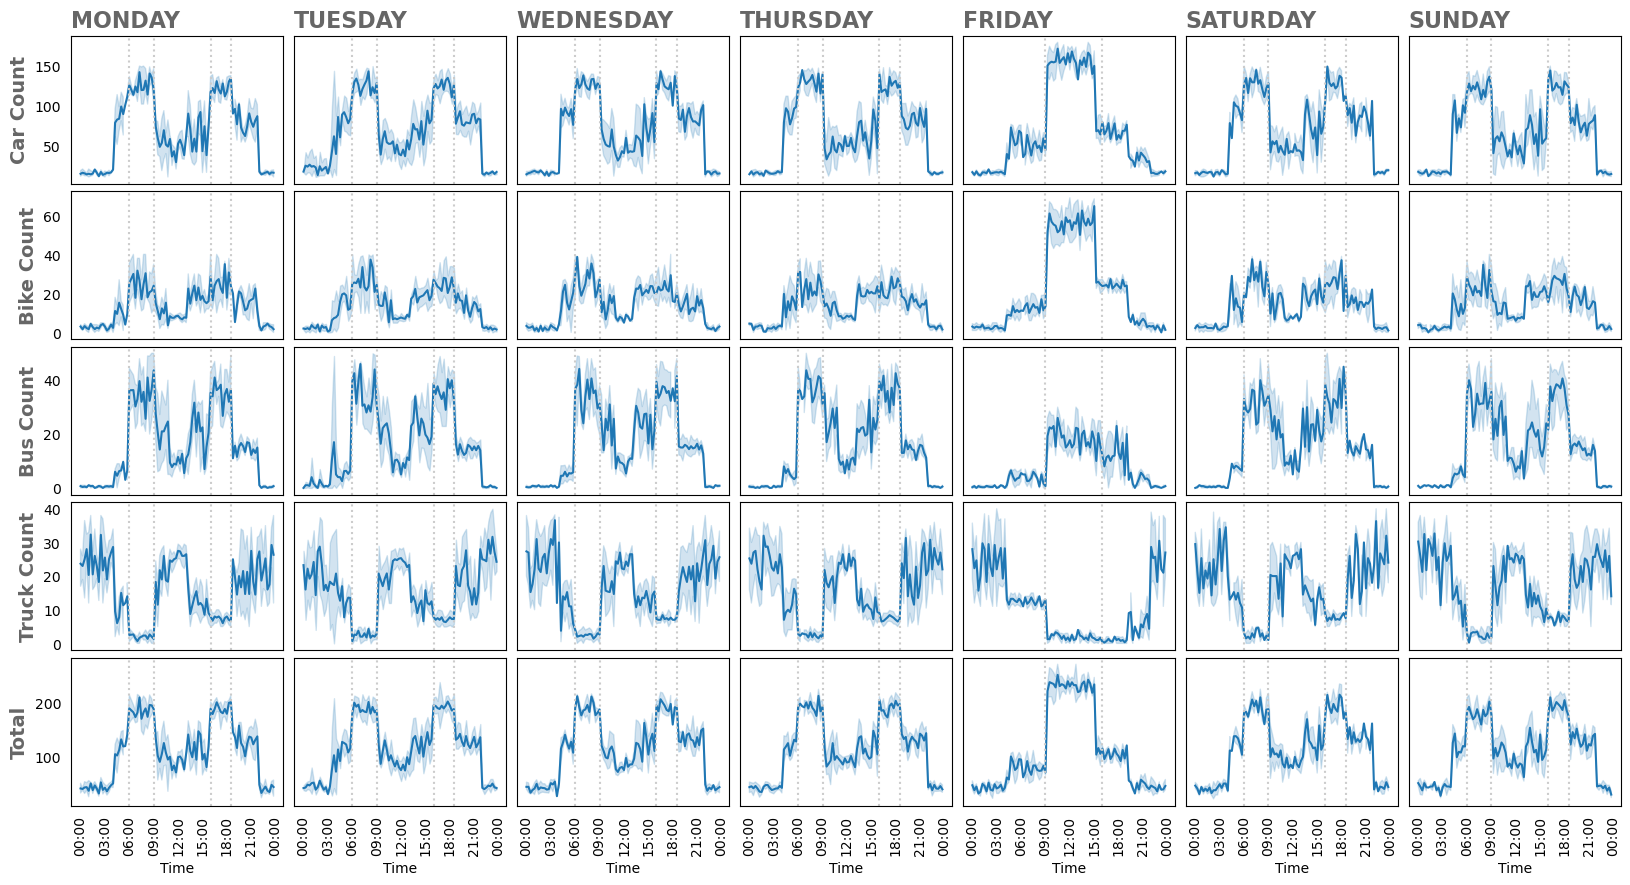

In [35]:
fig, axes = plt.subplots(nrows = 5, ncols = 7, figsize = (20,10), sharey = 'row', sharex = True)

DAYS_ = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
VEHICLES_ = ['CarCount', 'BikeCount', 'BusCount', 'TruckCount']

for ax,day in zip(axes[0,:].flat,DAYS_): #,day,vehicle in zip(axes.flat, DAYS_, VEHICLES_):
  
    g = sns.lineplot(x = 'Time', y = 'CarCount', data = data.loc[(data['Day of the week'] == day), :], ax = ax, legend = None)
    ax.tick_params(left = False, bottom = False)
    
    # g = sns.lineplot(x = 'Time', y = 'CarCount', hue = 'Day of the week', data = data.loc[(data['Day of the week'] == day), :], ax = ax)
    # # ax.tick_params(axis = 'x', rotation = 90)
    # # ax.xaxis.set_major_formatter(dates.DateFormatter("%H-%M"))
    # ax.legend(bbox_to_anchor = (1.0, 1.0), frameon = False, title = 'Day of the week')    

for ax,day in zip(axes[1,:].flat,DAYS_): #,day,vehicle in zip(axes.flat, DAYS_, VEHICLES_):

    g = sns.lineplot(x = 'Time', y = 'BikeCount', data = data.loc[(data['Day of the week'] == day), :], ax = ax, legend = None)
    # ax.tick_params(axis = 'x', rotation = 90)
    # ax.xaxis.set_major_formatter(dates.DateFormatter("%H-%M"))
    ax.tick_params(left = False, bottom = False)
    
for ax,day in zip(axes[2,:].flat,DAYS_): #,day,vehicle in zip(axes.flat, DAYS_, VEHICLES_):

    g = sns.lineplot(x = 'Time', y = 'BusCount', data = data.loc[(data['Day of the week'] == day), :], ax = ax, legend = None)
    # ax.tick_params(axis = 'x', rotation = 90)
    # ax.xaxis.set_major_formatter(dates.DateFormatter("%H-%M"))
    ax.tick_params(left = False, bottom = False)
    
for ax,day in zip(axes[3,:].flat,DAYS_): #,day,vehicle in zip(axes.flat, DAYS_, VEHICLES_):

    g = sns.lineplot(x = 'Time', y = 'TruckCount', data = data.loc[(data['Day of the week'] == day), :], ax = ax, legend = None)
    # ax.tick_params(axis = 'x', rotation = 90)
    # ax.xaxis.set_major_formatter(dates.DateFormatter("%H-%M"))
    ax.tick_params(left = False, bottom = False)
    
for ax,day in zip(axes[4,:].flat,DAYS_): #,day,vehicle in zip(axes.flat, DAYS_, VEHICLES_):

    g = sns.lineplot(x = 'Time', y = 'Total', data = data.loc[(data['Day of the week'] == day), :], ax = ax, legend = None)
    ax.tick_params(axis = 'x', rotation = 90)
    ax.xaxis.set_major_formatter(dates.DateFormatter("%H:%M"))
    ax.tick_params(left = False, bottom = False)

for i, YLABELS_ in zip([0,1,2,3,4], ['Car Count', 'Bike Count', 'Bus Count', 'Truck Count', 'Total']):
    axes[i,0].set_ylabel(YLABELS_, fontsize = 14, color = '0.4', fontweight = 'extra bold')
for i, TITLES_ in zip([0,1,2,3,4,5,6], DAYS_):
    axes[0,i].set_title(TITLES_.upper(), loc = 'left', color = '0.4', fontsize = 16, fontweight = 'extra bold')

    
for horas in ['00:00', '03:00', '06:00', '09:00', '12:00', '15:00', '18:00', '21:00', ]:
    print(horas, [x.get_position() for x in ax.get_xticklabels() if x.get_text() == horas])
            
for horas, posx in zip(['06:00', '09:00', '16:00', '18:30',], 
                       [-25566.75 + 0*0.125, -25566.75 + 3*0.125/3, -25566.75 + 10*0.125/3, -25566.75 + 12.5*0.125/3, ]):
    for i in [0,1,2,3,5,6]: # No Friday
        for j in range(5):
            axes[j,i].axvline(posx, linestyle = ':', color = '0.8')
            
for horas, posx in zip(['09:00',  '16:00',], 
                       [-25566.75 + 3*0.125/3, -25566.75 + 10*0.125/3, ]):
    for i in [4]: # Friday
        for j in range(5):
            axes[j,i].axvline(posx, linestyle = ':', color = '0.8')
    
fig.subplots_adjust(wspace = 0.05, hspace = 0.05)

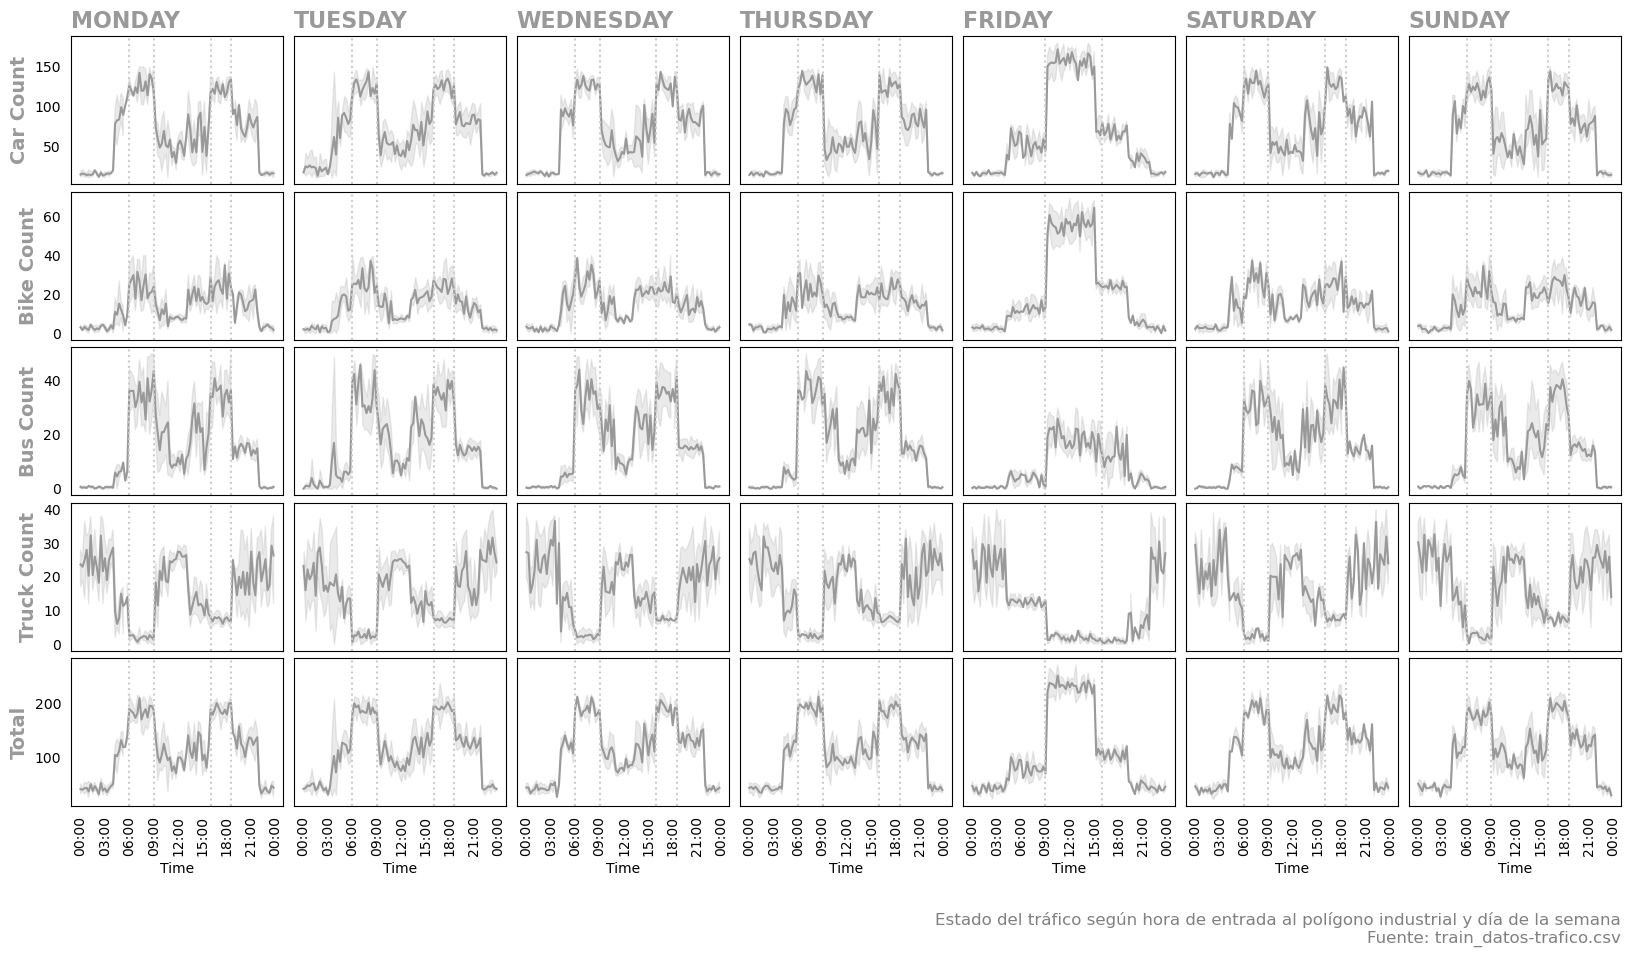

In [40]:
fig, axes = plt.subplots(nrows = 5, ncols = 7, figsize = (20,10), sharey = 'row', sharex = True)

DAYS_ = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
VEHICLES_ = ['CarCount', 'BikeCount', 'BusCount', 'TruckCount']

for ax,day in zip(axes[0,:].flat,DAYS_): #,day,vehicle in zip(axes.flat, DAYS_, VEHICLES_):
  
    g = sns.lineplot(x = 'Time', y = 'CarCount', data = data.loc[(data['Day of the week'] == day), :], color = '0.6', ax = ax, legend = None)
    ax.tick_params(left = False, bottom = False)

for ax,day in zip(axes[1,:].flat,DAYS_): 
    
    g = sns.lineplot(x = 'Time', y = 'BikeCount', data = data.loc[(data['Day of the week'] == day), :], color = '0.6', ax = ax, legend = None)
    ax.tick_params(left = False, bottom = False)
    
for ax,day in zip(axes[2,:].flat,DAYS_): 

    g = sns.lineplot(x = 'Time', y = 'BusCount', data = data.loc[(data['Day of the week'] == day), :], color = '0.6', ax = ax, legend = None)
    ax.tick_params(left = False, bottom = False)
    
for ax,day in zip(axes[3,:].flat,DAYS_): 

    g = sns.lineplot(x = 'Time', y = 'TruckCount', data = data.loc[(data['Day of the week'] == day), :], color = '0.6', ax = ax, legend = None)
    ax.tick_params(left = False, bottom = False)
    
for ax,day in zip(axes[4,:].flat,DAYS_):

    g = sns.lineplot(x = 'Time', y = 'Total', data = data.loc[(data['Day of the week'] == day), :], color = '0.6', ax = ax, legend = None)
    ax.tick_params(axis = 'x', rotation = 90)
    ax.xaxis.set_major_formatter(dates.DateFormatter("%H:%M"))
    ax.tick_params(left = False, bottom = False)

for i, YLABELS_ in zip([0,1,2,3,4], ['Car Count', 'Bike Count', 'Bus Count', 'Truck Count', 'Total']):
    axes[i,0].set_ylabel(YLABELS_, fontsize = 14, color = '0.6', fontweight = 'extra bold')
for i, TITLES_ in zip([0,1,2,3,4,5,6], DAYS_):
    axes[0,i].set_title(TITLES_.upper(), loc = 'left', color = '0.6', fontsize = 16, fontweight = 'extra bold')

            
for horas, posx in zip(['06:00', '09:00', '16:00', '18:30',], 
                       [-25566.75 + 0*0.125, -25566.75 + 3*0.125/3, -25566.75 + 10*0.125/3, -25566.75 + 12.5*0.125/3, ]):
    for i in [0,1,2,3,5,6]: # No Friday
        for j in range(5):
            axes[j,i].axvline(posx, linestyle = ':', color = '0.8')
            
for horas, posx in zip(['09:00',  '16:00',], 
                       [-25566.75 + 3*0.125/3, -25566.75 + 10*0.125/3, ]):
    for i in [4]: # Friday
        for j in range(5):
            axes[j,i].axvline(posx, linestyle = ':', color = '0.8')
            
texto = "Estado del tráfico según hora de entrada al polígono industrial y día de la semana"
texto = texto + "\nFuente: train_datos-trafico.csv"

# Agrega el texto fuera de la figura, abajo a la derecha
axes[4,6].annotate(texto, xy=(1, -0.95), 
            xycoords = 'axes fraction', 
            fontsize = 12, color = '0.5',
            horizontalalignment = 'right', 
            verticalalignment = 'bottom')
    
fig.subplots_adjust(wspace = 0.05, hspace = 0.05)

fig.savefig('./figures/traffic-density-by-vehicle-day-and-hour.pdf', format = 'pdf', bbox_inches = 'tight')

Vemos que hay efectos de alta densidad cuando hay un incremento en pocas horas del número de coches que entran en el polígono.

Podemos analizar el incremento en 30 minutos del número de vehículos.

Observamos varios puntos:

  * Hay alta densidad de 6:00 a 9:00 todos los días excepto los viernes.
  * También hay alta densidad entre las 15:00 y 18:00 de la tarde.
  * La frecuencia de acceso de camiones al polígono es muy diferente los viernes.

In [37]:
data = data.sort_values(by = ['Date', 'Time'])
data['Total_CumSum'] = data.groupby(['Date', ])['Total'].cumsum()
data['CarCount_CumSum'] = data.groupby(['Date', ])['CarCount'].cumsum()
data['BikeCount_CumSum'] = data.groupby(['Date', ])['BikeCount'].cumsum()
data['BusCount_CumSum'] = data.groupby(['Date', ])['BusCount'].cumsum()
data['TruckCount_CumSum'] = data.groupby(['Date', ])['TruckCount'].cumsum()

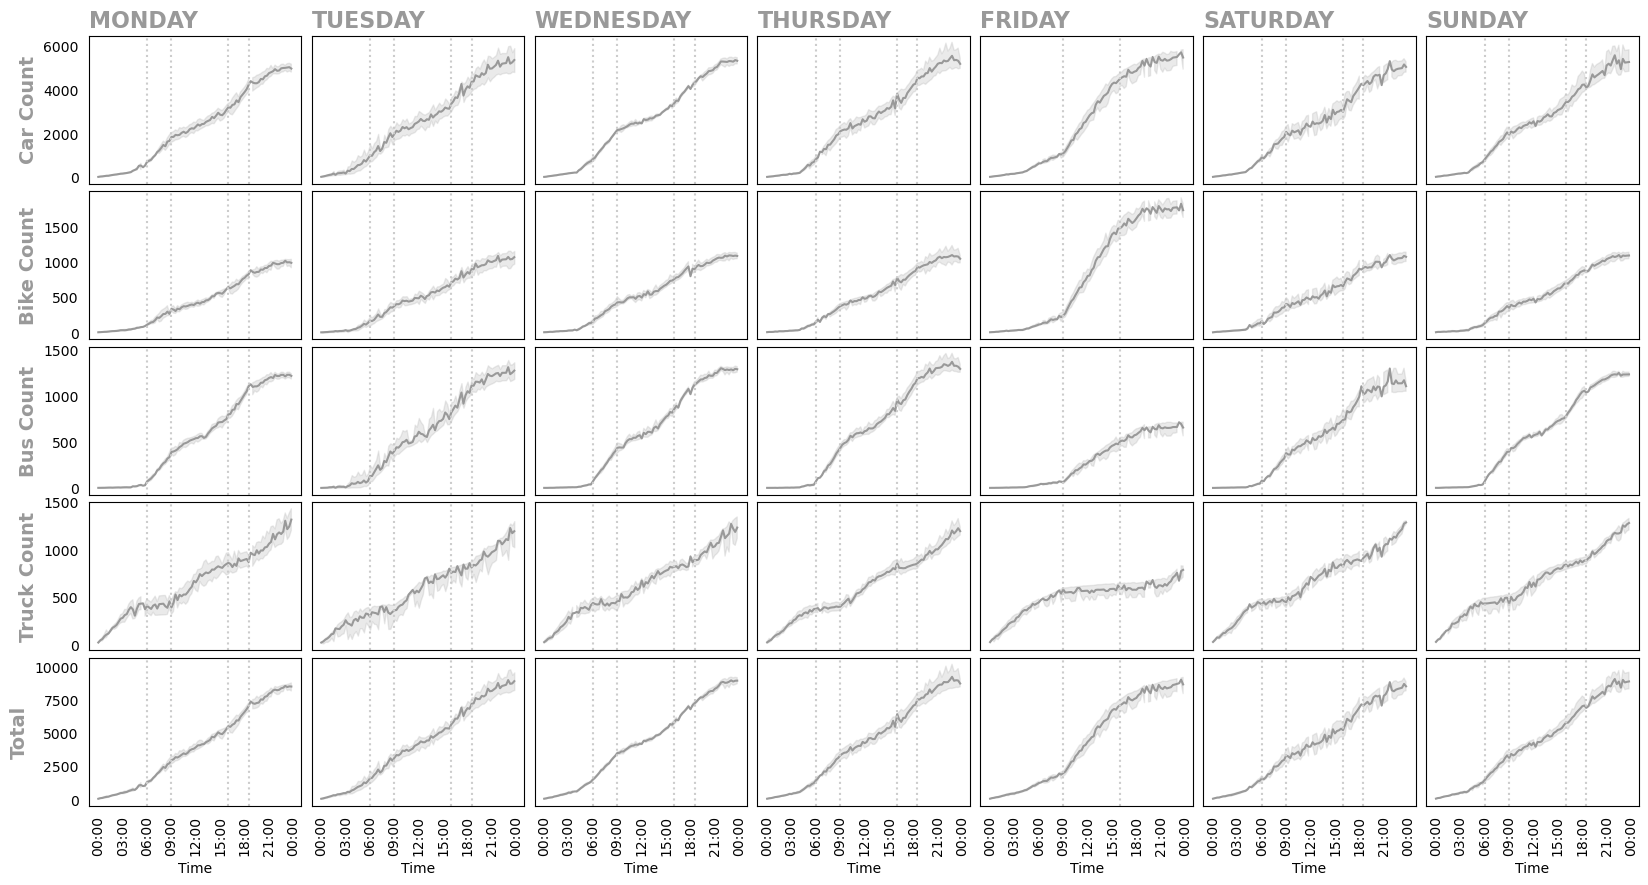

In [38]:
fig, axes = plt.subplots(nrows = 5, ncols = 7, figsize = (20,10), sharey = 'row', sharex = True)

DAYS_ = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
VEHICLES_ = ['CarCount', 'BikeCount', 'BusCount', 'TruckCount']

for ax,day in zip(axes[0,:].flat,DAYS_): #,day,vehicle in zip(axes.flat, DAYS_, VEHICLES_):
  
    g = sns.lineplot(x = 'Time', y = 'CarCount_CumSum', data = data.loc[(data['Day of the week'] == day), :], color = '0.6', ax = ax, legend = None)
    ax.tick_params(left = False, bottom = False)

for ax,day in zip(axes[1,:].flat,DAYS_): 
    
    g = sns.lineplot(x = 'Time', y = 'BikeCount_CumSum', data = data.loc[(data['Day of the week'] == day), :], color = '0.6', ax = ax, legend = None)
    ax.tick_params(left = False, bottom = False)
    
for ax,day in zip(axes[2,:].flat,DAYS_): 

    g = sns.lineplot(x = 'Time', y = 'BusCount_CumSum', data = data.loc[(data['Day of the week'] == day), :], color = '0.6', ax = ax, legend = None)
    ax.tick_params(left = False, bottom = False)
    
for ax,day in zip(axes[3,:].flat,DAYS_): 

    g = sns.lineplot(x = 'Time', y = 'TruckCount_CumSum', data = data.loc[(data['Day of the week'] == day), :], color = '0.6', ax = ax, legend = None)
    ax.tick_params(left = False, bottom = False)
    
for ax,day in zip(axes[4,:].flat,DAYS_):

    g = sns.lineplot(x = 'Time', y = 'Total_CumSum', data = data.loc[(data['Day of the week'] == day), :], color = '0.6', ax = ax, legend = None)
    ax.tick_params(axis = 'x', rotation = 90)
    ax.xaxis.set_major_formatter(dates.DateFormatter("%H:%M"))
    ax.tick_params(left = False, bottom = False)

for i, YLABELS_ in zip([0,1,2,3,4], ['Car Count', 'Bike Count', 'Bus Count', 'Truck Count', 'Total']):
    axes[i,0].set_ylabel(YLABELS_, fontsize = 14, color = '0.6', fontweight = 'extra bold')
for i, TITLES_ in zip([0,1,2,3,4,5,6], DAYS_):
    axes[0,i].set_title(TITLES_.upper(), loc = 'left', color = '0.6', fontsize = 16, fontweight = 'extra bold')

            
for horas, posx in zip(['06:00', '09:00', '16:00', '18:30',], 
                       [-25566.75 + 0*0.125, -25566.75 + 3*0.125/3, -25566.75 + 10*0.125/3, -25566.75 + 12.5*0.125/3, ]):
    for i in [0,1,2,3,5,6]: # No Friday
        for j in range(5):
            axes[j,i].axvline(posx, linestyle = ':', color = '0.8')
            
for horas, posx in zip(['09:00',  '16:00',], 
                       [-25566.75 + 3*0.125/3, -25566.75 + 10*0.125/3, ]):
    for i in [4]: # Friday
        for j in range(5):
            axes[j,i].axvline(posx, linestyle = ':', color = '0.8')
    
fig.subplots_adjust(wspace = 0.05, hspace = 0.05)

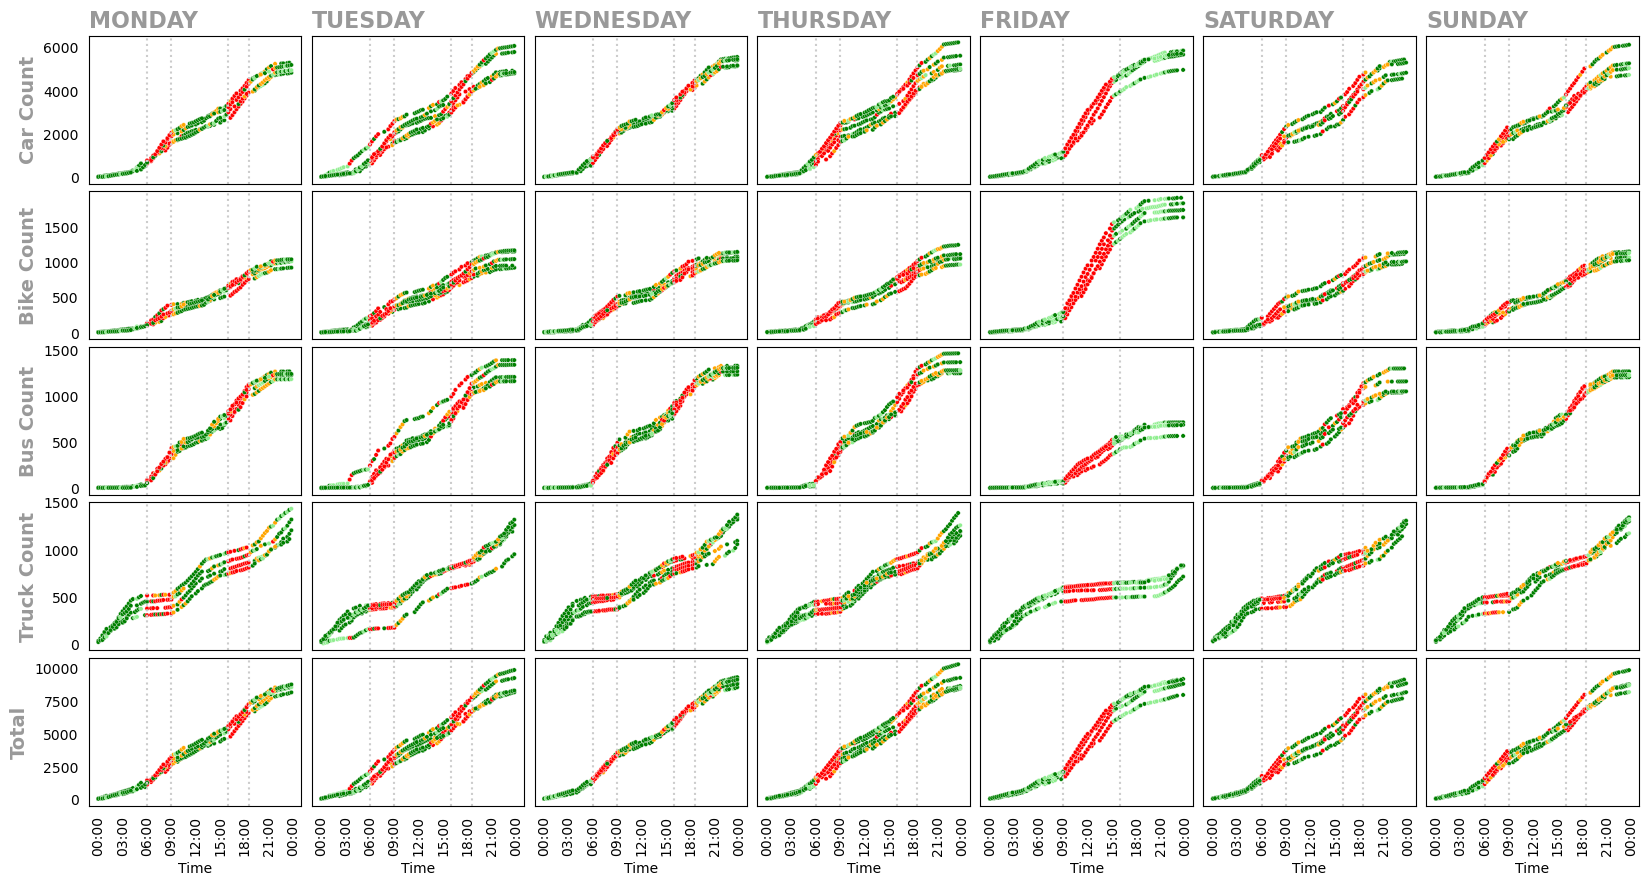

In [39]:
fig, axes = plt.subplots(nrows = 5, ncols = 7, figsize = (20,10), sharey = 'row', sharex = True)

DAYS_ = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
VEHICLES_ = ['CarCount', 'BikeCount', 'BusCount', 'TruckCount']

for ax,day in zip(axes[0,:].flat,DAYS_): #,day,vehicle in zip(axes.flat, DAYS_, VEHICLES_):
  
    g = sns.scatterplot(x = 'Time', y = 'CarCount_CumSum', data = data.loc[(data['Day of the week'] == day), :],  hue = 'Traffic Situation', 
                        palette = {'normal': 'green', 'low': 'lightgreen', 'high': 'orange', 'heavy': 'red'},
                        s = 10, ax = ax, legend = None)
    ax.tick_params(left = False, bottom = False)

for ax,day in zip(axes[1,:].flat,DAYS_): 
    
    g = sns.scatterplot(x = 'Time', y = 'BikeCount_CumSum', data = data.loc[(data['Day of the week'] == day), :],  hue = 'Traffic Situation', 
                        palette = {'normal': 'green', 'low': 'lightgreen', 'high': 'orange', 'heavy': 'red'},
                        s = 10, ax = ax, legend = None)
    ax.tick_params(left = False, bottom = False)
    
for ax,day in zip(axes[2,:].flat,DAYS_): 

    g = sns.scatterplot(x = 'Time', y = 'BusCount_CumSum', data = data.loc[(data['Day of the week'] == day), :],  hue = 'Traffic Situation', 
                        palette = {'normal': 'green', 'low': 'lightgreen', 'high': 'orange', 'heavy': 'red'},
                        s = 10, ax = ax, legend = None)
    ax.tick_params(left = False, bottom = False)
    
for ax,day in zip(axes[3,:].flat,DAYS_): 

    g = sns.scatterplot(x = 'Time', y = 'TruckCount_CumSum', data = data.loc[(data['Day of the week'] == day), :],  hue = 'Traffic Situation', 
                        palette = {'normal': 'green', 'low': 'lightgreen', 'high': 'orange', 'heavy': 'red'},
                        s = 10, ax = ax, legend = None)
    ax.tick_params(left = False, bottom = False)
    
for ax,day in zip(axes[4,:].flat,DAYS_):

    g = sns.scatterplot(x = 'Time', y = 'Total_CumSum', data = data.loc[(data['Day of the week'] == day), :],  hue = 'Traffic Situation', 
                        palette = {'normal': 'green', 'low': 'lightgreen', 'high': 'orange', 'heavy': 'red'},
                        s = 10, ax = ax, legend = None)
    ax.tick_params(axis = 'x', rotation = 90)
    ax.xaxis.set_major_formatter(dates.DateFormatter("%H:%M"))
    ax.tick_params(left = False, bottom = False)

for i, YLABELS_ in zip([0,1,2,3,4], ['Car Count', 'Bike Count', 'Bus Count', 'Truck Count', 'Total']):
    axes[i,0].set_ylabel(YLABELS_, fontsize = 14, color = '0.6', fontweight = 'extra bold')
for i, TITLES_ in zip([0,1,2,3,4,5,6], DAYS_):
    axes[0,i].set_title(TITLES_.upper(), loc = 'left', color = '0.6', fontsize = 16, fontweight = 'extra bold')

            
for horas, posx in zip(['06:00', '09:00', '16:00', '18:30',], 
                       [-25566.75 + 0*0.125, -25566.75 + 3*0.125/3, -25566.75 + 10*0.125/3, -25566.75 + 12.5*0.125/3, ]):
    for i in [0,1,2,3,5,6]: # No Friday
        for j in range(5):
            axes[j,i].axvline(posx, linestyle = ':', color = '0.8')
            
for horas, posx in zip(['09:00',  '16:00',], 
                       [-25566.75 + 3*0.125/3, -25566.75 + 10*0.125/3, ]):
    for i in [4]: # Friday
        for j in range(5):
            axes[j,i].axvline(posx, linestyle = ':', color = '0.8')
    
fig.subplots_adjust(wspace = 0.05, hspace = 0.05)